# Linear Regression for Stock Price Prediction (3 year Dataset)

### Importing the required libraries

Below are the libraries that are used in order to import data into data frame and library for calculate the performance metrics

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

import sklearn.metrics as sklm

%matplotlib inline 

### Load the financial history price of APPL using Pandas Library

Loading the data into pandas data frame is certainly one of the most important steps as we can view the data value from the excel data set. We need to read the excel file into a dataframe and the job will done by pandas data frame

In [2]:
dataframe = pd.read_csv("AAPL_3Y.csv",parse_dates = ['Date'],index_col = 'Date')

print("size: ",dataframe.shape)

# To display the top 10 rows
dataframe.head(10)

size:  (777, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-10-16,54.732498,55.747501,54.189999,55.537498,53.658726,116736000
2018-10-17,55.575001,55.660000,54.834999,55.297501,53.426846,91541600
2018-10-18,54.465000,54.935001,53.250000,54.005001,52.178062,130325200
2018-10-19,54.514999,55.314999,54.357498,54.827499,52.972744,132314800
2018-10-22,54.947498,55.840000,54.735001,55.162498,53.296410,115168400
2018-10-23,53.957500,55.812500,53.674999,55.682499,53.798817,155071200
2018-10-24,55.650002,56.057499,53.634998,53.772499,51.953426,163702000
2018-10-25,54.427502,55.345001,54.187500,54.950001,53.091099,119423200
2018-10-26,53.974998,55.047501,53.167500,54.075001,52.245701,189033600


### Display the historical prices of APPL stock in graph

Use the plot with figsize to set the size of the figure to a certain size. The y-axis of the graph is set to Close_Prices to show the closing prices of the stock

<function matplotlib.pyplot.show(close=None, block=None)>

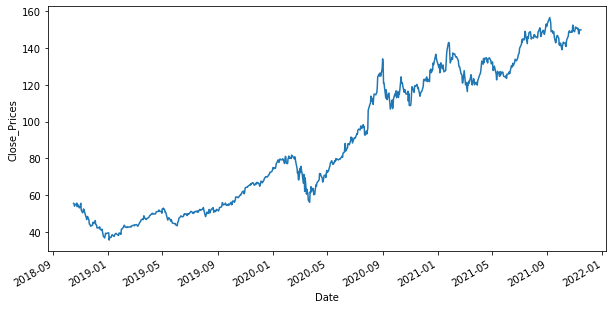

In [3]:
dataframe.Close.plot(figsize=(10,5))
plt.ylabel("Close_Prices")
plt.show

In [4]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 777 entries, 2018-10-16 to 2021-11-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       777 non-null    float64
 1   High       777 non-null    float64
 2   Low        777 non-null    float64
 3   Close      777 non-null    float64
 4   Adj Close  777 non-null    float64
 5   Volume     777 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 42.5 KB


In [5]:
dataframe.describe()

,Open,High,Low,Close,Adj Close,Volume
count,777.000000,777.000000,777.000000,777.000000,777.000000,7.770000e+02
mean,89.777954,90.805895,88.769585,89.836715,88.870939,1.243223e+08
std,37.919964,38.266472,37.494989,37.888284,38.111473,5.991063e+07
min,35.994999,36.430000,35.500000,35.547501,34.464798,4.100000e+07
25%,52.189999,52.540001,51.762501,52.195000,50.991123,8.397360e+07
50%,79.457497,80.112503,78.912498,79.577499,78.539322,1.089533e+08
75%,126.250000,127.639999,125.010002,126.000000,125.370987,1.463228e+08
max,156.979996,157.259995,154.389999,156.690002,156.262573,4.265100e+08


### Set the split boundary to split the dataset

The code in the cell below set the training_size into 70% of total length of dataset. Then, dataset is split into 70% of training data and 30% testing data

Dimension of train data:  (543, 6)
Dimension of test data:  (234, 6)


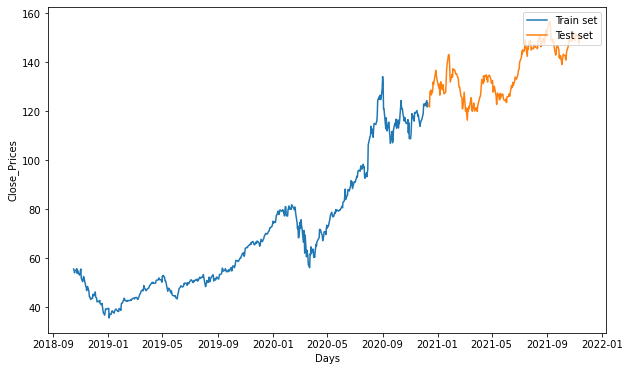

In [6]:
# Split train data and test data
training_size = int(len(dataframe)*0.7)
train_dataset, test_dataset = dataframe.iloc[:training_size], dataframe.iloc[training_size:]

# Plot train and test data
plt.figure(figsize = (10,6))
plt.plot(train_dataset.Close)
plt.plot(test_dataset.Close)
plt.xlabel('Days')
plt.ylabel('Close_Prices')
plt.legend(['Train set','Test set'], loc='upper right')

print('Dimension of train data: ', train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

## The data are available in a pre-processed form. The preprocessing includes the following:
1. Noise Removal.
2. Data Normalization. 


### Noise Removal

The "close price" and "adjusted closing prices" will be drop from the dataset to form the features training set. <br>
Only the "close price" will be selected to form the label training set

In [7]:
#Split train data for X and Y
train_dataset = train_dataset.reset_index().drop('Date',axis = 1)

X_train = train_dataset.drop(['Close','Adj Close'], axis = 1)
Y_train = train_dataset[['Close']]

#Split test data for X and Y
test_dataset = test_dataset.reset_index().drop('Date',axis = 1)

X_test = test_dataset.drop(['Close','Adj Close'], axis = 1)
Y_test = test_dataset[['Close']]

print(X_train)
print(Y_test)

           Open        High         Low     Volume
0     54.732498   55.747501   54.189999  116736000
1     55.575001   55.660000   54.834999   91541600
2     54.465000   54.935001   53.250000  130325200
3     54.514999   55.314999   54.357498  132314800
4     54.947498   55.840000   54.735001  115168400
..          ...         ...         ...        ...
538  122.599998  122.860001  121.519997   78260400
539  122.309998  124.570000  122.250000   86712000
540  124.370003  124.980003  123.089996   82225500
541  124.529999  125.949997  121.000000  115089200
542  120.500000  123.870003  120.150002   81312200

[543 rows x 4 columns]
          Close
0    122.410004
1    121.779999
2    127.879997
3    127.809998
4    128.699997
..          ...
229  150.809998
230  147.919998
231  147.869995
232  149.990005
233  150.000000

[234 rows x 1 columns]


### Data Normalization

Import the MinMaxScaler library from scikit-learn to perform the data normalization process. The value in each column will be translated into the range 0 and 1

In [8]:
#for normalization data
from sklearn.preprocessing import MinMaxScaler
scaler_x = MinMaxScaler(feature_range=(0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

#FIt the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(Y_train)

#Apply the scaler to training data
X_train_normalize = input_scaler.transform(X_train)
Y_train_normalize = output_scaler.transform(Y_train)



#Different scaler for input and output
scaler_x_test = MinMaxScaler(feature_range = (0,1))
scaler_y_test = MinMaxScaler(feature_range = (0,1))

#FIt the scaler using available training data
input_scaler_test = scaler_x_test.fit(X_test)
output_scaler_test = scaler_y_test.fit(Y_test)

X_test_normalize = input_scaler_test.transform(X_test)
Y_test_normalize = output_scaler_test.transform(Y_test)



print('X_train_normalize.shape:', X_train_normalize.shape)
print('Y_train_normalize.shape:', Y_train_normalize.shape)
print('X_test_normalize.shape:', X_test_normalize.shape)
print('Y_test_normalize.shape:', Y_test_normalize.shape)

X_train_normalize.shape: (543, 4)
Y_train_normalize.shape: (543, 1)
X_test_normalize.shape: (234, 4)
Y_test_normalize.shape: (234, 1)


In [9]:
print("X_train_normalize: \n\n", X_train_normalize)
print("Y_train_normalize: \n\n", Y_train_normalize)

print("X_test_normalize: \n\n", X_test_normalize)
print("Y_test_normalize: \n\n", Y_test_normalize)

pd.DataFrame(X_train_normalize).to_csv('X_train_normalize_test.csv')
pd.DataFrame(Y_train_normalize).to_csv('Y_train_normalize_test.csv')

X_train_normalize: 

 [[0.18443328 0.19022651 0.19667473 0.18707717]
 [0.19272605 0.18936485 0.20346206 0.12096089]
 [0.1818003  0.18222552 0.18678312 0.22273856]
 ...
 [0.86987555 0.87198431 0.9217089  0.09651317]
 [0.87145039 0.88153619 0.89971589 0.18275556]
 [0.83178309 0.86105373 0.89077137 0.09411644]]
Y_train_normalize: 

 [[0.20267152]
 [0.20023827]
 [0.18713407]
 [0.19547309]
 [0.19886953]
 [0.20414163]
 [0.18477682]
 [0.19671509]
 [0.18784378]
 [0.17755305]
 [0.18023979]
 [0.1943325 ]
 [0.20284897]
 [0.16548804]
 [0.15055888]
 [0.15608447]
 [0.17174866]
 [0.16804807]
 [0.15785872]
 [0.13175171]
 [0.12683445]
 [0.11307126]
 [0.12475605]
 [0.13012952]
 [0.11068867]
 [0.08818086]
 [0.08767394]
 [0.07629329]
 [0.08219906]
 [0.08123591]
 [0.09821814]
 [0.09469496]
 [0.09223633]
 [0.10805264]
 [0.08744583]
 [0.08245254]
 [0.0666616 ]
 [0.06947509]
 [0.06701646]
 [0.06820776]
 [0.07289685]
 [0.05903225]
 [0.05512889]
 [0.06052773]
 [0.04739816]
 [0.03710744]
 [0.02164599]
 [0.011760

### Import library required for linear regression

The class "sklearn.linear_model.LinearRegression(*, fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=None, positive=False)" is call to develop the linear regression model

The code in this cell also define and train the linear regression model using the training features and labels.

In [10]:
from sklearn.linear_model import LinearRegression

Multivariable_LR = LinearRegression()
Multivariable_LR.fit(X_train_normalize,Y_train_normalize)
Multivariable_LR.get_params(deep=True)

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [11]:
print("Linear Score: ",Multivariable_LR.score(X_train_normalize,Y_train_normalize))

R2_score = Multivariable_LR.score(X_train_normalize,Y_train_normalize)*100
print("R2_score: ",'{:.2f}'.format(R2_score))

Linear Score:  0.9993631445157947
R2_score:  99.94


In [12]:
Multivariable_LR.coef_

array([[-0.56434382,  0.88322584,  0.66356227, -0.0056397 ]])

In [13]:
Multivariable_LR.intercept_

array([0.00557198])

In [14]:
prediction_of_LR = Multivariable_LR.predict(X_test_normalize)
prediction_of_LR_readable = scaler_y_test.inverse_transform(prediction_of_LR)
print(prediction_of_LR_readable)

[[119.79933854]
 [120.97309895]
 [126.02480374]
 [126.42966129]
 [127.74852636]
 [125.75554155]
 [125.59058052]
 [131.80743176]
 [130.4772937 ]
 [132.25072056]
 [135.98377655]
 [135.53701982]
 [133.69057661]
 [132.20065988]
 [127.90158102]
 [130.11029079]
 [128.6220937 ]
 [129.90444417]
 [130.09772765]
 [128.45814396]
 [127.27124295]
 [129.96361746]
 [128.49215079]
 [127.68413461]
 [126.81387976]
 [131.04713739]
 [138.41196034]
 [138.10944822]
 [140.10165601]
 [142.49474186]
 [141.86010122]
 [139.36962479]
 [131.90778734]
 [132.452622  ]
 [134.77771319]
 [133.527088  ]
 [135.47386256]
 [135.76639395]
 [135.46125064]
 [136.64011892]
 [134.85324887]
 [134.1928471 ]
 [134.24148065]
 [133.36012954]
 [129.88735899]
 [127.52915328]
 [128.57963504]
 [126.69297559]
 [121.19778487]
 [122.14122854]
 [121.9265535 ]
 [122.06219735]
 [125.52983362]
 [125.07564226]
 [122.08789502]
 [119.52921057]
 [117.68745758]
 [115.85487409]
 [119.86442352]
 [118.86442438]
 [120.64174616]
 [118.50422547]
 [121.51

In [15]:
Y_test_read = scaler_y_test.inverse_transform(Y_test_normalize)
Y_train_read = scaler_y.inverse_transform(Y_train_normalize)

print("Actual Value\n")
print(Y_test_read)
print("\nPrediction\n")
print(prediction_of_LR_readable)


Actual Value

[[122.410004]
 [121.779999]
 [127.879997]
 [127.809998]
 [128.699997]
 [126.660004]
 [128.229996]
 [131.880005]
 [130.960007]
 [131.970001]
 [136.690002]
 [134.869995]
 [133.720001]
 [132.690002]
 [129.410004]
 [131.009995]
 [126.599998]
 [130.919998]
 [132.050003]
 [128.979996]
 [128.800003]
 [130.889999]
 [128.910004]
 [127.139999]
 [127.830002]
 [132.029999]
 [136.869995]
 [139.070007]
 [142.919998]
 [143.160004]
 [142.059998]
 [137.089996]
 [131.960007]
 [134.139999]
 [134.990005]
 [133.940002]
 [137.389999]
 [136.759995]
 [136.910004]
 [136.009995]
 [135.389999]
 [135.130005]
 [135.369995]
 [133.190002]
 [130.839996]
 [129.710007]
 [129.869995]
 [126.      ]
 [125.860001]
 [125.349998]
 [120.989998]
 [121.260002]
 [127.790001]
 [125.120003]
 [122.059998]
 [120.129997]
 [121.419998]
 [116.360001]
 [121.089996]
 [119.980003]
 [121.959999]
 [121.029999]
 [123.989998]
 [125.57    ]
 [124.760002]
 [120.529999]
 [119.989998]
 [123.389999]
 [122.540001]
 [120.089996]
 [120.

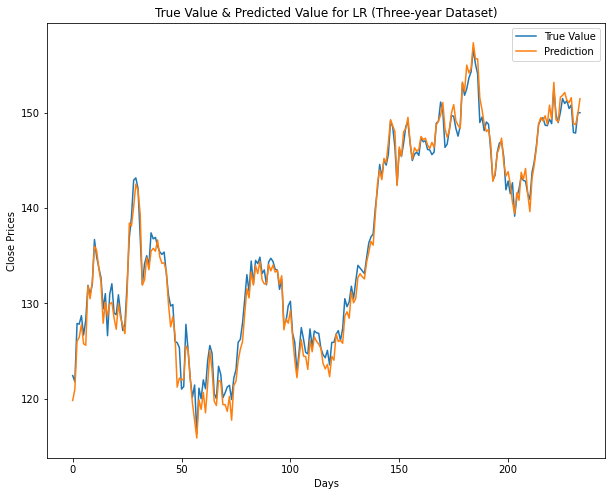

In [16]:
# Plot true future vs prediction
def plot_result(prediction, y_test, model_name):
    plt.figure(figsize = (10,8))
    range_future = len(prediction)
    plt.plot(np.arange(range_future), np.array(y_test), label='True Value')
    plt.plot(np.arange(range_future), np.array(prediction), label='Prediction')
    plt.legend(loc='upper right')
    plt.title('True Value & Predicted Value for '+ model_name)
    plt.ylabel('Close Prices')
    plt.xlabel('Days')
    
    
#plot_result(prediction_of_BidirectionLSTM, Y_test_read, 'BidirectionLSTM')
plot_result(prediction_of_LR_readable, Y_test_read, 'LR (Three-year Dataset)')

In [17]:
print("Linear Score: ", Multivariable_LR.score(X_test_normalize,Y_test_normalize))

R2_score = Multivariable_LR.score(X_test_normalize,Y_test_normalize)*100
print('R2_score: {:.2f}'.format(R2_score))

Linear Score:  0.9867899297190331
R2_score: 98.68


### Calculate the performance metrics

The Mean Square Error, Root Mean Square Error, Mean Absolute Error and R-square is calculated in this function

In [18]:
import sklearn.metrics as sklm
import math

def print_metrics(y_true, y_predicted, year, model):
    print("This prediction model is: " + model)
    print("The size of dataset is: " + year)
    print('+-----------------------------+--------+')
    print('Mean Square Error (MSE)       = {:.4f}'.format(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error (RMSE) = {:.4f}'.format(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error (MAE)     = {:.4f}'.format(sklm.mean_absolute_error(y_true, y_predicted)))
    
    # R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.
    r2 = sklm.r2_score(y_true, y_predicted)
    print('R-square (R^2)                = {:.2f}'.format(r2*100))
    print('+-----------------------------+--------+')
    
    
print_metrics(Y_test_read, prediction_of_LR_readable, "3-year",'Linear Regression') 

This prediction model is: Linear Regression
The size of dataset is: 3-year
+-----------------------------+--------+
Mean Square Error (MSE)       = 1.3465
Root Mean Square Error (RMSE) = 1.1604
Mean Absolute Error (MAE)     = 0.9030
R-square (R^2)                = 98.68
+-----------------------------+--------+
